# Utilities

In this document we play and document with other utilities of the pyramidman system such as the sending of emails of the generation of reports.

In [11]:
%load_ext autoreload
%autoreload 2

from pyramidman.unwrapper import unwrap
from pyramidman.speech_commands import SpeechCommandsHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Mailing system

In [12]:
from pyramidman.email import Email, EmailConfig

In [13]:
email = Email()
email_config = EmailConfig()

unwrap(email_config)

<EmailConfig>	object has children:
    <str>	user:	pyramidman.damvad@gmail.com
    <str>	pwd:	howdoesitscale
    <list>	recipients
    <str>	subject:	[Meeting] Report of meeting
    <str>	body:	

  <list>	recipients has children:
      <str>	recipients[0]:	manuwhs@gmail.com
      <str>	recipients[1]:	nreusch1997@gmail.com




In [14]:
email_config.body = "Hello <br><br> bitch"

def send_email(email_config):
    email = Email(email_config.user,email_config.pwd,email_config.recipients)
    email.create_msgRoot(subject = email_config.subject )

    email.add_HTML(email_config.body )
    email.send_email()

send_email(email_config)

successfully sent the mail


## 2. Report generation

In [15]:
from pyramidman.Thoth import Papyrus

In [16]:
papyrus = Papyrus()
unwrap(papyrus)

<Papyrus>	object has children:
    <str>	title:	pyramidman presentation
    <str>	report_type:	meeting
    <str>	date:	2020-01-08
    <NoneType>	attendants:	None
    <NoneType>	document:	None
    <str>	logo_filepath:	../img/pyramidman_logo2.png




In [22]:
report_filepath = "../reports/presentation5.docx"
from pyramidman.utils import create_folder_if_needed

create_folder_if_needed("../reports/")
papyrus.set_transcription("I dont know. What to. Write")
papyrus.create_document(report_filepath)

## Complex combinations

In [23]:
email = Email(email_config.user,email_config.pwd,email_config.recipients)
email.create_msgRoot(subject = email_config.subject )

email.add_HTML(email_config.body )
email.add_file(report_filepath)
email.send_email()

successfully sent the mail


# 3. Text summarization

In [46]:
text ="""In monotheistic thought, God is conceived of as the supreme being, creator deity, and principal object of faith.[1] God is usually conceived as being omniscient (all-knowing), omnipotent (all-powerful), omnipresent (all-present) and as having an eternal and necessary existence. These attributes are used either in way of analogy or are taken literally. God is most often held to be incorporeal (immaterial).[1][2][3] Incorporeality and corporeality of God are related to conceptions of transcendence (being outside nature) and immanence (being in nature) of God, with positions of synthesis such as the "immanent transcendence".

Some religions describe God without reference to gender, while others or their translations use sex-specific terminology. Judaism, for example, attributes only a grammatical gender to God, using terms such as "Him" or "Father" for convenience.[4]

God has been conceived as either personal or impersonal. In theism, God is the creator and sustainer of the universe, while in deism, God is the creator, but not the sustainer, of the universe. In pantheism, God is the universe itself. In atheism, there is an absence of belief in God. In agnosticism, the existence of God is deemed unknown or unknowable. God has also been conceived as the source of all moral obligation, and the "greatest conceivable existent".[1] Many notable philosophers have developed arguments for and against the existence of God.[5]

Monotheists refer to their gods using names prescribed by their respective religions, with some of these names referring to certain cultural ideas about their god's identity and attributes. In the ancient Egyptian era of Atenism, possibly the earliest recorded monotheistic religion, this deity was called Aten,[6] premised on being the one "true" Supreme Being and creator of the universe.[7] In the Hebrew Bible and Judaism, Elohim, Adonai, YHWH (Hebrew: יהוה‎) and other names are used as the names of God. Yahweh and Jehovah, possible vocalizations of YHWH, are used in Christianity. In the Christian doctrine of the Trinity, God, coexisting in three "persons", is called the Father, the Son, and the Holy Spirit. In Islam, the name Allah is used, while Muslims also have a multitude of titular names for God. In Hinduism, Brahman is often considered a monistic concept of God.[8] In Chinese religion, Shangdi is conceived as the progenitor (first ancestor) of the universe, intrinsic to it and constantly bringing order to it. Other religions have names for the concept of God, including Baha in the Bahá'í Faith,[9] Waheguru in Sikhism,[10] Sang Hyang Widhi Wasa in Balinese Hinduism,[11] and Ahura Mazda in Zoroastrianism.[12]

The many different conceptions of God, and competing claims as to God's characteristics, aims, and actions, have led to the development of ideas of omnitheism, pandeism,[13] or a perennial philosophy, which postulates that there is one underlying theological truth, of which all religions express a partial understanding, and as to which "the devout in the various great world religions are in fact worshipping that one God, but through different, overlapping concepts""]
"""

In [24]:
import spacy
import pytextrank


# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

doc = nlp(text)

# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    print(p.chunks)

0.1637     1  minimal generating sets
[minimal generating sets]
0.1440     4  systems
[systems, systems, systems, a system]
0.1200     3  solutions
[solutions, solutions, solutions]
0.1081     1  mixed types
[mixed types]
0.1080     1  strict inequations
[strict inequations]
0.1080     1  nonstrict inequations
[nonstrict inequations]
0.1063     1  diophantine equations
[Diophantine equations]
0.1044     1  a minimal supporting set
[a minimal supporting set]
0.1036     1  linear constraints
[linear constraints]
0.0954     1  a minimal set
[a minimal set]
0.0938     1  upper bounds
[Upper bounds]
0.0826     1  algorithms
[algorithms]
0.0824     1  natural numbers
[natural numbers]
0.0823     1  components
[components]
0.0814     1  diophantine
[Diophantine]
0.0810     1  all the considered types systems
[all the considered types systems]
0.0734     2  compatibility
[Compatibility, compatibility]
0.0716     1  construction
[construction]
0.0701     1  the set
[the set]
0.0651     2  crite

In [26]:
from gensim.summarization.summarizer import summarize
text

'Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types.'

In [27]:
summarize(text, word_count = 80)

'Compatibility of systems of linear constraints over the set of natural numbers.\nCriteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered.\nUpper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given.\nThese criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types.'

# 4. Command Handler

This class handles the commands.

In [28]:
speech_command_handler = SpeechCommandsHandler(mode = "active")

In [29]:
unwrap(speech_command_handler)

<SpeechCommandsHandler>	object has children:
    <str>	keyword:	egypt
    <str>	mode:	active
    <list>	commands

  <list>	commands has children:
      <dict>	commands[0]

    <dict>	commands[0] has children:
        <str>	name:	music_player
        <list>	sentences
        <list>	sentences
        <list>	args

      <list>	args has children:
          <AudioParameters>	args[0]

        <AudioParameters>	args[0] has children:
            <int>	chunk:	4096
            <int>	sample_format:	8
            <NoneType>	subtype:	None
            <int>	channels:	1
            <int>	sample_rate:	48000
            <int>	input_device_index:	0

      <list>	sentences has children:
          <str>	sentences[0]:	facilitate

      <list>	sentences has children:
          <str>	sentences[0]:	facilitate
          <str>	sentences[0]:	facilitate




In [30]:
speech_command_handler.commands

[{'name': 'music_player',
  'sentences': ['facilitate'],
  'function': <function pyramidman.speech_commands.play_generic_sentence(audio_params, folder='../audios/meeting_facilitation/')>,
  'args': [<pyramidman.audio_parameters.AudioParameters at 0x7f1148055490>]}]

In [31]:
speech_command_handler.process("egypt facilitate")

processing  egypt facilitate
keyword detected
playing


## Word cloud

In [32]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
wordcloud = WordCloud().generate(text)

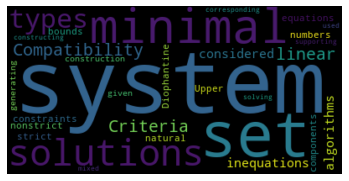

In [34]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

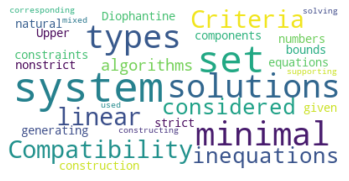

In [35]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
wordcloud.to_file("../img/first_review.png")

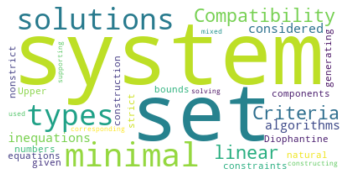

In [37]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [58]:
mask = np.array(Image.open("../img/pyramidman_logo.jpg"))
mask = np.array(Image.open("../img/pyramidman_logo2."))
# mask = np.array(Image.open("../img/denmark-country-flag.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(text)


(-0.5, 399.5, 249.5, -0.5)

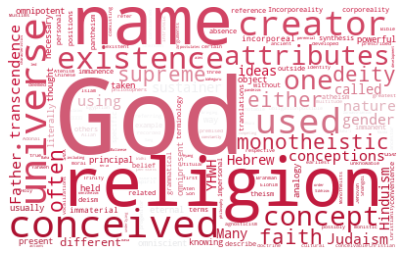

In [59]:
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [61]:
def generate_word_cloud_image(input_image, text, output_image):
    """ Create that word cloud broh"""
    mask = np.array(Image.open(input_image))
    # stopwords=stopwords,
    wordcloud = WordCloud( background_color="white", max_words=1000, mask=mask).generate(text)

    image_colors = ImageColorGenerator(mask)
    wordcloud.recolor(color_func=image_colors)
    wordcloud.to_file(output_image)

input_image = "../img/pyramidman_logo.jpg"
output_image = "../img/pyramidman_logo_wordcloud.jpg"

generate_word_cloud_image(input_image, text, output_image)
